<a href="https://colab.research.google.com/github/arunaaxani/Covid-19-Analysis/blob/main/Covid__19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [ ]:
df1=pd.read_excel(r"/content/drive/MyDrive/major project/Covid cases in India.xlsx")
df1.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [ ]:
#processing of data
df1['Total Cases']=df1['Total Confirmed cases (Indian National)']+df1['Total Confirmed cases ( Foreign National )']
df1

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,12,0,1,0,12
1,2,Chhattisgarh,6,0,0,0,6
2,3,Delhi,38,1,6,1,39
3,4,Gujarat,43,0,0,3,43
4,5,Haryana,16,14,11,0,30
5,6,Himachal Pradesh,4,0,0,1,4
6,7,Karnataka,20,0,3,2,20
7,8,Kerala,131,7,11,0,138
8,9,Madhya Pradesh,23,0,0,1,23
9,10,Maharashtra,144,3,15,4,147


In [ ]:
df1['Active Cases']=df1['Total Cases']-(df1['Death']+df1['Cured'])
df1

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,1,Andhra Pradesh,12,0,1,0,12,11
1,2,Chhattisgarh,6,0,0,0,6,6
2,3,Delhi,38,1,6,1,39,32
3,4,Gujarat,43,0,0,3,43,40
4,5,Haryana,16,14,11,0,30,19
5,6,Himachal Pradesh,4,0,0,1,4,3
6,7,Karnataka,20,0,3,2,20,15
7,8,Kerala,131,7,11,0,138,127
8,9,Madhya Pradesh,23,0,0,1,23,22
9,10,Maharashtra,144,3,15,4,147,128


In [ ]:
df1.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,12,0,1,0,12
1,2,Chhattisgarh,6,0,0,0,6
2,3,Delhi,38,1,6,1,39
3,4,Gujarat,43,0,0,3,43
4,5,Haryana,16,14,11,0,30
5,6,Himachal Pradesh,4,0,0,1,4
6,7,Karnataka,20,0,3,2,20
7,8,Kerala,131,7,11,0,138
8,9,Madhya Pradesh,23,0,0,1,23
9,10,Maharashtra,144,3,15,4,147


In [ ]:
Total_Active_Cases=df1.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [ ]:
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [ ]:
Total_Death_Cases=df1.groupby('Name of State / UT')['Death'].sum().sort_values(ascending=False).to_frame()

In [ ]:
Total_Death_Cases

,Death
Name of State / UT,
Maharashtra,4
Gujarat,3
Karnataka,2
West Bengal,1
Bihar,1
Tamil Nadu,1
Punjab,1
Delhi,1
Madhya Pradesh,1


In [ ]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [ ]:
Total_Death_Cases.style.background_gradient(cmap='Reds')

,Death
Name of State / UT,
Maharashtra,4
Gujarat,3
Karnataka,2
West Bengal,1
Bihar,1
Tamil Nadu,1
Punjab,1
Delhi,1
Madhya Pradesh,1


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/major project/covid_vaccine_statewise.csv')
df2

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,30/05/2021,West Bengal,10547015.0,381157.0,1170.0,10547015.0,3865954.0,5871662.0,4674095.0,1258.0,1625834.0,12787135.0,0.0,1100.0,2202804.0,4404252.0,3938023.0,14412969.0
5140,31/05/2021,West Bengal,10838457.0,839415.0,2511.0,10838457.0,3879678.0,6050228.0,4786796.0,1433.0,1650999.0,13067136.0,0.0,1144.0,2402085.0,4469534.0,3964698.0,14718135.0
5141,01/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5142,02/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Total_vaccinated=df2.groupby('State')['Total Individuals Vaccinated'].sum().sort_values(ascending=False).to_frame()

In [ ]:
Total_vaccinated

,Total Individuals Vaccinated
State,
India,8.547775e+09
Maharashtra,9.037383e+08
Rajasthan,7.527872e+08
Uttar Pradesh,7.374382e+08
Gujarat,7.017549e+08
West Bengal,6.015065e+08
Karnataka,5.335539e+08
Madhya Pradesh,4.774107e+08
Bihar,4.125792e+08


In [ ]:
Total_vaccinated.drop(['India'],inplace=True)

In [ ]:
Total_vaccinated

,Total Individuals Vaccinated
State,
Maharashtra,903738327.0
Rajasthan,752787174.0
Uttar Pradesh,737438239.0
Gujarat,701754931.0
West Bengal,601506486.0
Karnataka,533553908.0
Madhya Pradesh,477410657.0
Bihar,412579169.0
Kerala,406319798.0


In [ ]:
Total_vaccinated.style.background_gradient(cmap='Reds')

,Total Individuals Vaccinated
State,
Maharashtra,903738327.000000
Rajasthan,752787174.000000
Uttar Pradesh,737438239.000000
Gujarat,701754931.000000
West Bengal,601506486.000000
Karnataka,533553908.000000
Madhya Pradesh,477410657.000000
Bihar,412579169.000000
Kerala,406319798.000000


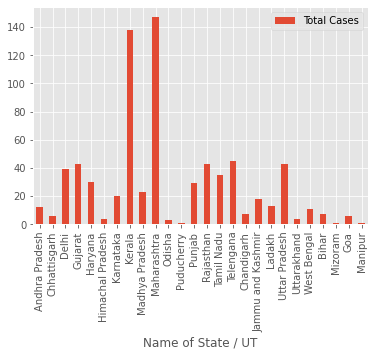

In [ ]:
#graphical representation

#Pandas vis
df1.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()

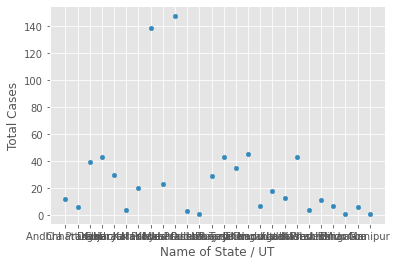

In [ ]:
df1.plot(kind='scatter',x='Name of State / UT',y='Total Cases')

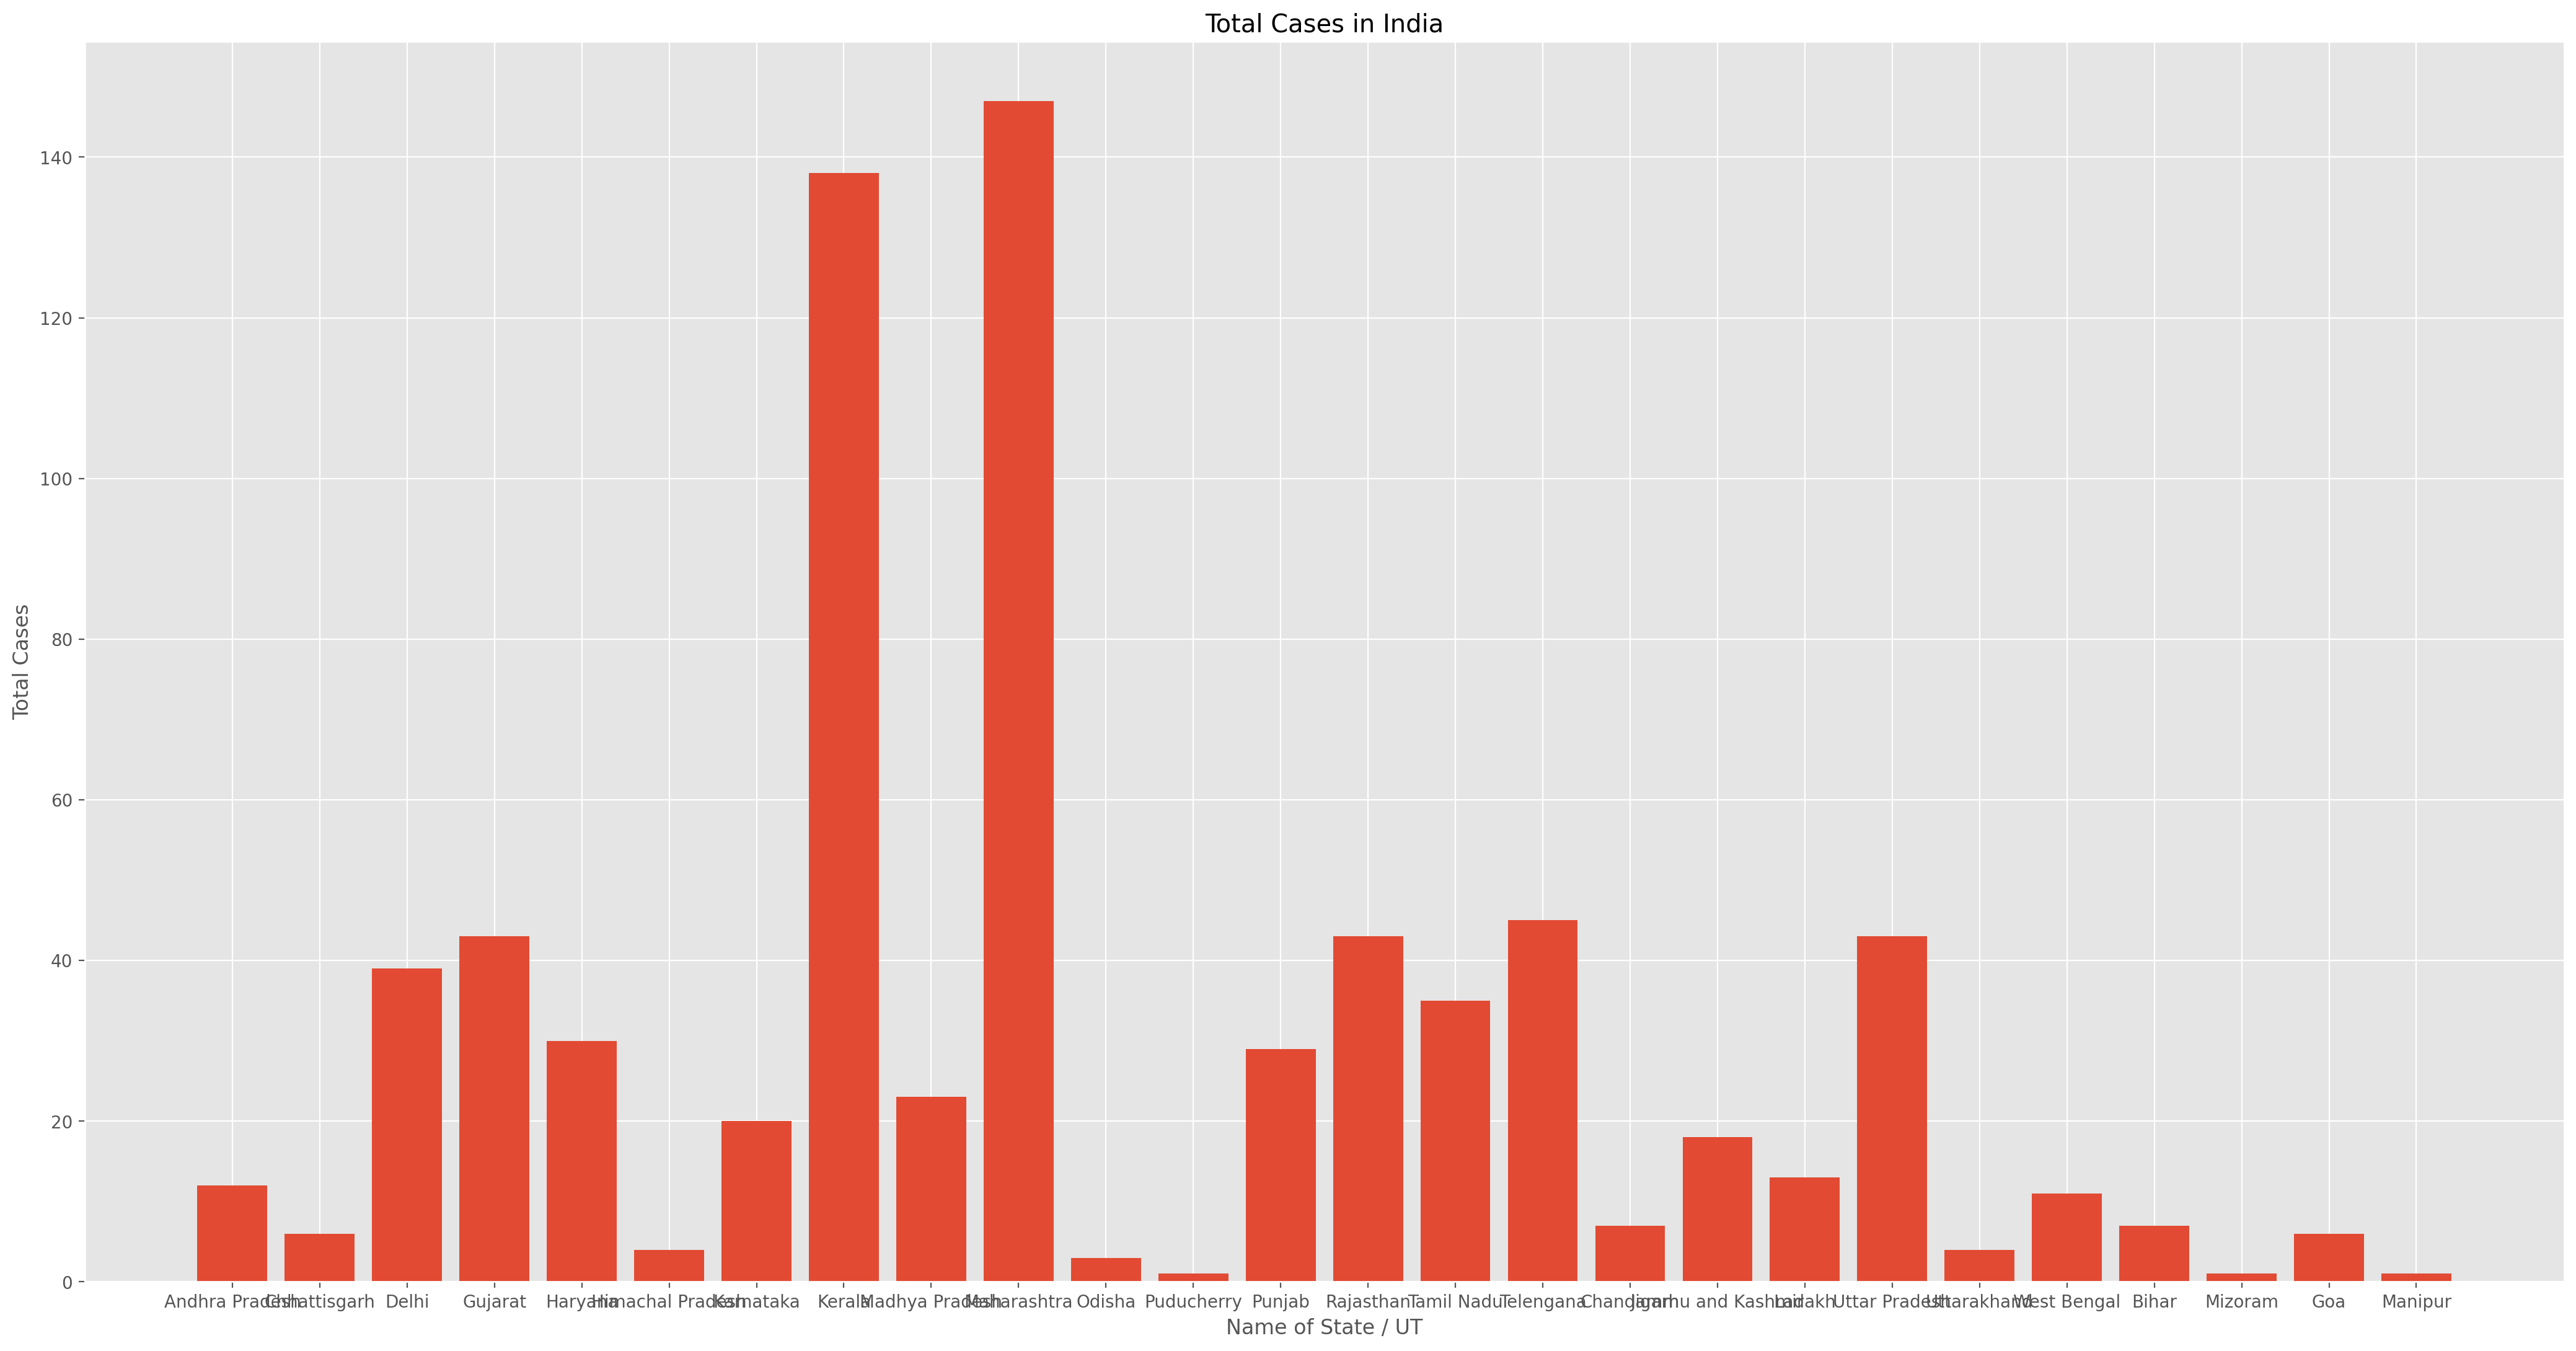

In [ ]:

#Matplotlib
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df1['Name of State / UT'],df1['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()
#plotly
#fig=go.Figure()
#fig.add_trace(go.Bar(x=df1['Name of State / UT'],y=df1['Total Cases']))
#fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))



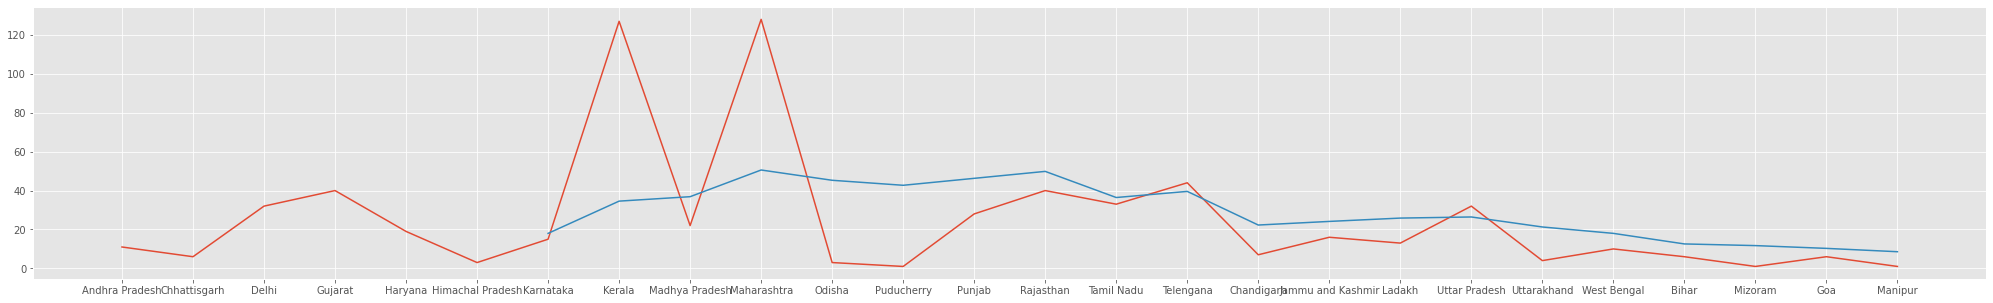

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,5))
plt.plot(df1['Name of State / UT'],df1['Active Cases'])
plt.plot(df1['Name of State / UT'],df1['Active Cases'].rolling(7).mean())

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/major project/covid_19_india.csv')

In [ ]:
df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15549,15550,2021-06-01,8:00 AM,Telangana,-,-,540986,3281,578351
15550,15551,2021-06-01,8:00 AM,Tripura,-,-,44908,519,51974
15551,15552,2021-06-01,8:00 AM,Uttarakhand,-,-,294671,6452,329494
15552,15553,2021-06-01,8:00 AM,Uttar Pradesh,-,-,1633947,20497,1691488


In [ ]:
df3 = df3.rename(columns={'Deaths':'y','Date':'ds'})
df3

,Sno,ds,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,y,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15549,15550,2021-06-01,8:00 AM,Telangana,-,-,540986,3281,578351
15550,15551,2021-06-01,8:00 AM,Tripura,-,-,44908,519,51974
15551,15552,2021-06-01,8:00 AM,Uttarakhand,-,-,294671,6452,329494
15552,15553,2021-06-01,8:00 AM,Uttar Pradesh,-,-,1633947,20497,1691488


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


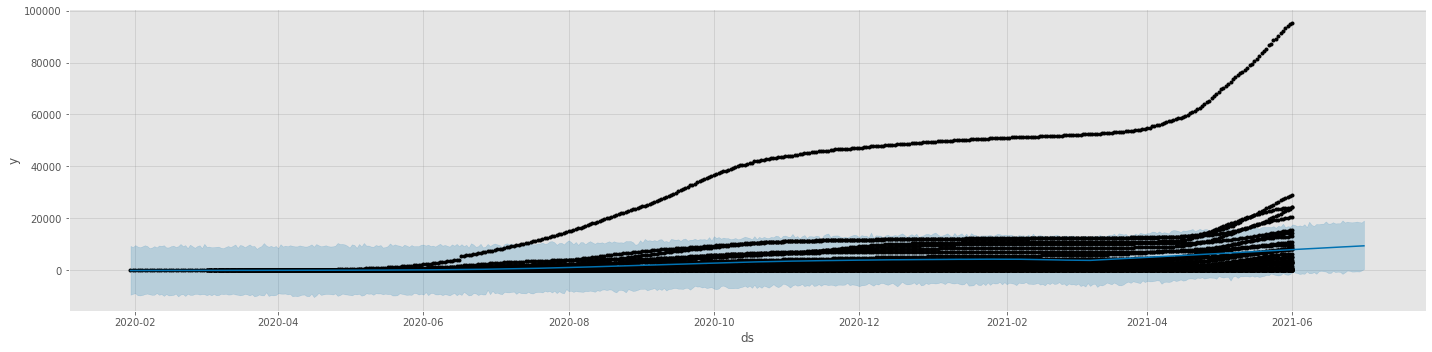

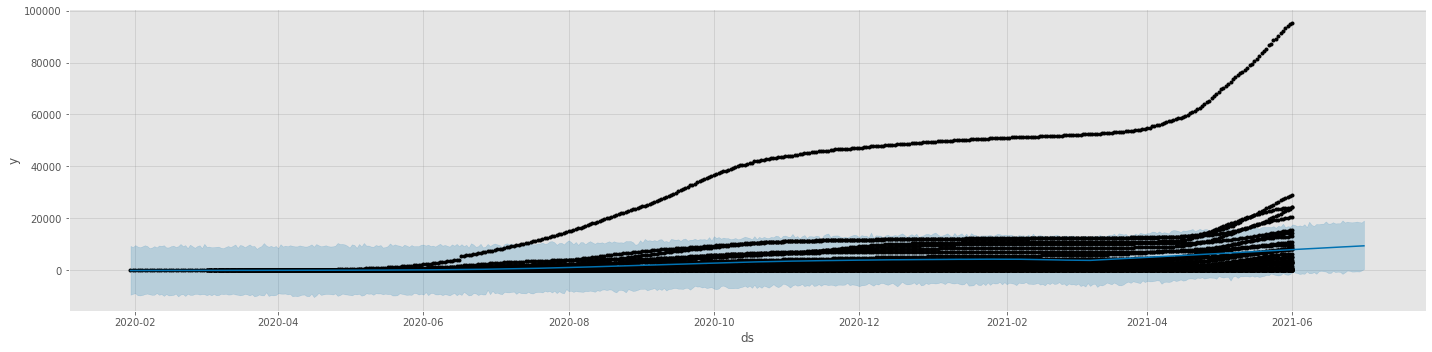

In [ ]:
#Forecasting using FbProphet for 30 days
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df3)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast = model.predict(x)
df3= forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
model.plot(forecast,figsize=(20,5))

In [ ]:
print("1.State having highest number of cases \n", end="")
print(Total_Active_Cases.iloc[0,:])
print("\n\n2.State having lowest number of cases \n ", end="")
print(Total_Active_Cases.iloc[-1,:])
print("\n\n3.State having highest number of deaths \n ",end="")
print(Total_Death_Cases.iloc[0,:])
print("\n\n4.State having lowest number of deaths \n",end="")
print(Total_Death_Cases.iloc[-1,:])
print("\n\n5.State is most vaccinated \n",end="")
print(Total_vaccinated.iloc[0])

1.State having highest number of cases 
Total Cases    147
Name: Maharashtra, dtype: int64


2.State having lowest number of cases 
 Total Cases    1
Name: Puducherry, dtype: int64


3.State having highest number of deaths 
 Death    4
Name: Maharashtra, dtype: int64


4.State having lowest number of deaths 
Death    0
Name: Andhra Pradesh, dtype: int64


5.State is most vaccinated 
Total Individuals Vaccinated    903738327.0
Name: Maharashtra, dtype: float64
